Explore the bash history of this computer
========

Load the bash history on this computer

In [3]:
from os.path import expanduser
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

home = expanduser("~")
with (open(home + "/.bash_history")) as f:
    history = f.read()
    corpus = history.split('\n')
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    counts = X.toarray().sum(axis=0)
    words = vectorizer.get_feature_names()
    word_count = zip(words, counts)


The most popular words are:


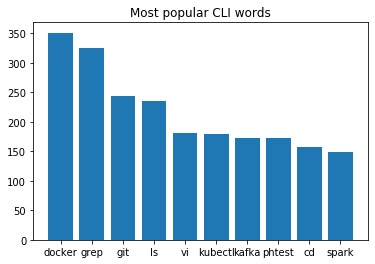

In [4]:
sorted_word_count = sorted(word_count, key = lambda x: -x[1])
top = sorted_word_count[:10]
top_words = list(map(lambda x: x[0], top))
top_counts = list(map(lambda x: x[1], top))
_ = plt.bar(top_words, top_counts) 
plt.title("Most popular CLI words")
plt.show()